# <font color='blue'>A Brief Exploration of Ford GoBike</font>
### by Lin Chen

## <font color='cornflowerblue'>Preliminary Data Wrangling</font>
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
# loading Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
import calendar
import math

%matplotlib inline

In [3]:
# gathering data

df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# assessing data

df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
68243,413,2019-02-20 03:57:42.6090,2019-02-20 04:04:35.9590,178.0,Broadway at 30th St,37.819381,-122.261928,182.0,19th Street BART Station,37.809013,-122.268247,2354,Subscriber,1956.0,Male,No
124929,298,2019-02-11 08:11:14.2480,2019-02-11 08:16:12.3220,26.0,1st St at Folsom St,37.787290,-122.394380,13.0,Commercial St at Montgomery St,37.794231,-122.402923,5418,Subscriber,1989.0,Male,No
148957,3756,2019-02-06 19:22:07.1380,2019-02-06 20:24:43.4310,182.0,19th Street BART Station,37.809013,-122.268247,202.0,Washington St at 8th St,37.800754,-122.274894,4920,Subscriber,1974.0,Male,Yes
127337,2578,2019-02-10 15:32:27.9670,2019-02-10 16:15:26.9190,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,205.0,Miles Ave at Cavour St,37.838800,-122.258732,4508,Customer,NaN,NaN,No
52149,258,2019-02-21 17:31:51.7560,2019-02-21 17:36:10.5900,343.0,Bryant St at 2nd St,37.783172,-122.393572,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,6417,Subscriber,1973.0,Male,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
sum(df.duplicated())

0

#### Data cleaning guides:
> Missing Values<br>
1. There are 197 missing values for start and end stations' ids and names. However, no missing values for their latitudes and longitudes. Therefore, we could try to find out ids and names by latitudes and longitudes. If it doesn't work, just drop them.<br>
2. There are 8265 missing values for member birth year and gender. It's okay not fixing them, but empty values must be NaN for correct calculation of mean, median, etc.<br>

> Wrong Datatypes<br>
1. All id values shall be under datatype of strings, since they are not numeric values.<br>
2. Member birth year shall be under datatype of integer, not strings.
3. Start and end time shall be under datatype of datetime, not strings, and duration shall be calculated by them to ensure precision.

In [8]:
# cleaning data

df_clean = df.copy()

In [9]:
# for rows with missing station id/name values, their latitude and longitude values only have 2 decimal places

df_clean.query("start_station_id == 'NaN'").head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes


In [10]:
df_missid = df_clean.query("start_station_id == 'NaN'") # take 197 rows with missing station id/name out
df_clean.drop(df_missid.index, axis=0, inplace=True) # set rest rows without missing station id/name separately
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [11]:
# for a certain station, by using its latitude, we shall get its longitude with tiny standard deviation

df_clean.query("start_station_latitude == '37.791300'")['start_station_longitude'].describe()

count    1.018000e+03
mean    -1.223991e+02
std      3.127925e-13
min     -1.223991e+02
25%     -1.223991e+02
50%     -1.223991e+02
75%     -1.223991e+02
max     -1.223991e+02
Name: start_station_longitude, dtype: float64

In [12]:
# for a certain station, by using its latitude, we shall get station id/name very precisely

df_clean.query("start_station_latitude == '37.791300'")[['start_station_id', 'start_station_name']].value_counts()

start_station_id  start_station_name                             
20.0              Mechanics Monument Plaza (Market St at Bush St)    1018
dtype: int64

In [13]:
# however, when using data from df_missid, with certain latitude value, corresponding longitude values have much larger standard deviation

df_missid.query("start_station_latitude == '37.40'")['start_station_longitude'].describe()

count     63.000000
mean    -121.932063
std        0.006758
min     -121.940000
25%     -121.940000
50%     -121.930000
75%     -121.930000
max     -121.920000
Name: start_station_longitude, dtype: float64

#### conclusion for missing values: 
1. for those data rows with missing station id/name values, by using certain latitude value, the standard deviation of longitude values could be around 0.007, which could result in around 1.2 km error on the map, which is not acceptable for our research. <font color='red'>All these data rows shall be dropped.</font>
2. missing values for birth year and gender are recorded as null values rather than numeric or string values, so it is fine for us to carry out analysis.

In [14]:
# change datatypes of start and end time

df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean['duration_sec'] = (df_clean['end_time'] - df_clean['start_time']).dt.total_seconds() # re-calculate column duration_sec

In [15]:
# change datatypes of all id values

for i in ['start_station_id', 'end_station_id', 'bike_id']:
    try:
        df_clean[i] = df_clean[i].astype(int).astype(str) # for start/end station id, turn to integer then string
    except:
        df_clean[i] = df_clean[i].astype(str) # for bike id, directly turn to string

In [16]:
arr = pd.array(df_clean.member_birth_year, dtype=pd.Int64Dtype())
df_clean.member_birth_year = arr

In [17]:
df_clean = df_clean.reset_index(); # remember to reset index

In [18]:
# double-check

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    183215 non-null  int64         
 1   duration_sec             183215 non-null  float64       
 2   start_time               183215 non-null  datetime64[ns]
 3   end_time                 183215 non-null  datetime64[ns]
 4   start_station_id         183215 non-null  object        
 5   start_station_name       183215 non-null  object        
 6   start_station_latitude   183215 non-null  float64       
 7   start_station_longitude  183215 non-null  float64       
 8   end_station_id           183215 non-null  object        
 9   end_station_name         183215 non-null  object        
 10  end_station_latitude     183215 non-null  float64       
 11  end_station_longitude    183215 non-null  float64       
 12  bike_id         

#### conclusion for wrong datatypes: 
1. all columns are now transferred into correct datatypes.

### *What is the structure of your dataset?*

> Each row represents a single bikeride, which is described by multiple attributes represented by columns, such as start/end time, station and corresponding user/bike information.

### *What is/are the main feature(s) of interest in your dataset?*

> 1. What is the average duration for a ride? What are peak and off-peak hours? Any seasonality for those values?
2. Which station is most and least popular as destination? What about those features for start place?
3. Gender and age map for bike users, and their preferences in terms of duration and station.
4. Influence taken by user types and share/unshare to the bikeride.
5. Description on top 5 frequent users and top 5 longest ride (time).

### *What features in the dataset do you think will help support your investigation into your feature(s) of interest?*

> 1. duration_sec, start_time and end_time
2. start_station (id/name), end_station (id/name)
3. member_birth_year, member_gender
4. user_type, bike_share_for_all_trip
5. all data above

## <font color='cornflowerblue'>Univariate Exploration</font>

**Question:** What does the total distribution of biking duration looks like?

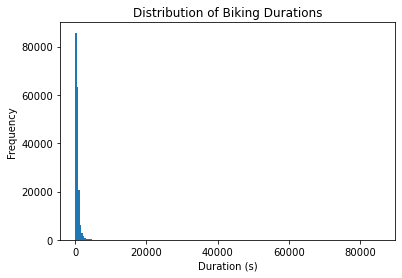

In [23]:
plt.hist(data = df_clean, x = 'duration_sec', bins=200);
plt.xlabel('Duration (s)');
plt.ylabel('Frequency');
plt.title('Distribution of Biking Durations');

# the distribution of bike ride durations is severely right-skewed

**Observation:** Looks like that there are many very long biking activities, though most people only ride bike for a few minutes.

In [47]:
df_clean.duration_sec.describe() # there are some extra-large values

count    183215.000000
mean        726.401111
std        1795.077832
min          61.081000
25%         325.412500
50%         514.489000
75%         796.148500
max       85444.830000
Name: duration_sec, dtype: float64

In [112]:
total = df_clean.shape[0]
print('Bike tours longer than 16 hr:', round(df_clean.query("duration_sec>57600").shape[0]/total*100, 2), '%')
print('Bike tours longer than 4 hr:', round(df_clean.query("duration_sec>14400").shape[0]/total*100, 2), '%')
print('Bike tours longer than 1 hr:', round(df_clean.query("duration_sec>3600").shape[0]/total*100, 2), '%')
print('Bike tours longer than 30 min:', round(df_clean.query("duration_sec>1800").shape[0]/total*100, 2), '%')

# Therefore we shall use log10 for x-axis 

Bike tours longer than 16 hr: 0.03 %
Bike tours longer than 4 hr: 0.16 %
Bike tours longer than 1 hr: 0.93 %
Bike tours longer than 30 min: 3.69 %


In [49]:
# set bin size and plot histogram

np.log10(df_clean.duration_sec.describe())

count    5.262961
mean     2.861176
std      3.254083
min      1.785906
25%      2.512434
50%      2.711376
75%      2.900994
max      4.931686
Name: duration_sec, dtype: float64

**Question:** Can we take a close look over the biking duration distribution with a logarithmic scale axis?

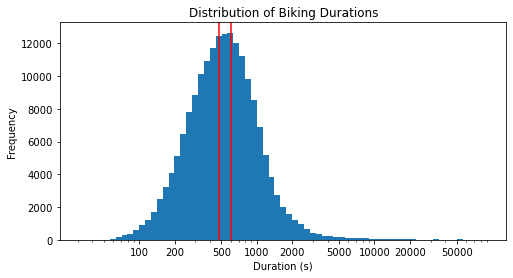

In [24]:
bins = 10**np.arange(1.5, 5, 0.05)
plt.figure(figsize=(8, 4));
plt.hist(data = df_clean, x = 'duration_sec', bins=bins);
plt.xscale('log')
ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
labels = ['{}'.format(h) for h in ticks]
plt.xticks(ticks, labels);
plt.axvline(480, color='r');
plt.axvline(600, color='r'); # most bike ride durations falls into 8 to 10 minutes
plt.xlabel('Duration (s)');
plt.ylabel('Frequency');
plt.title('Distribution of Biking Durations');

**Observation:** It is true that some people ride bike for more than 12 hours, but most people rike bike from 8 to 10 minutes (the range inside two red lines).

In [27]:
# split the start/end time into date and time in a day

df_clean['start_date'] = [d.date() for d in df_clean['start_time']]
df_clean['start_hour'] = [d.time() for d in df_clean['start_time']]
df_clean['end_date'] = [d.date() for d in df_clean['end_time']]
df_clean['end_hour'] = [d.time() for d in df_clean['end_time']]

**Question:** Which day does people ride bikes more often?

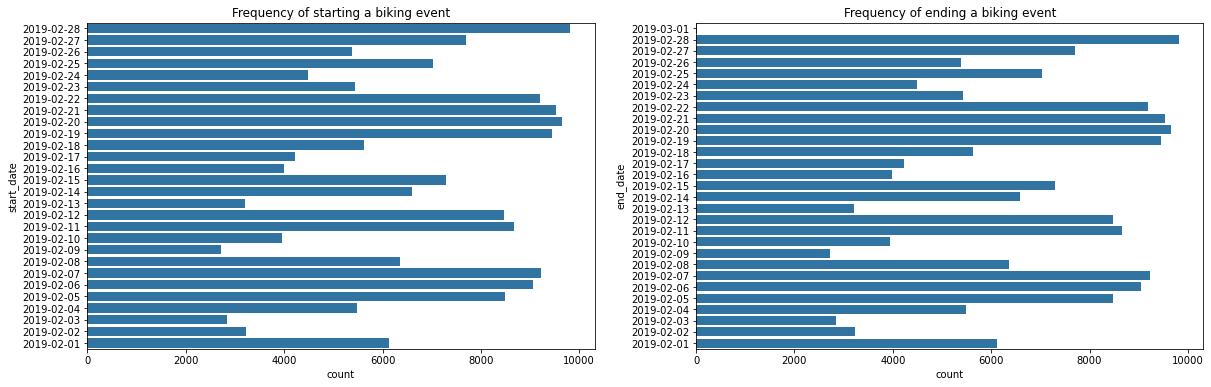

In [28]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(20, 6));
plt.subplot(1, 2, 1) 
sb.countplot(data=df_clean, y='start_date', color=base_color);
plt.title('Frequency of starting a biking event');
plt.subplot(1, 2, 2) 
sb.countplot(data=df_clean, y='end_date', color=base_color); # 2 plots are almost identical, but in end_date we can find 2019-03-01
plt.title('Frequency of ending a biking event');

# 1. must be someone who turned bike the second day
# 2. there might be weekdays/weekends difference for bike ride frequency

**Observation:** Cannot easily see a trend here, but there is clear difference between days. Maybe should break those days into 7 days in a week, like Monday, Tuesday...

In [53]:
datemax = df_clean.end_date.max()
df_clean[df_clean.end_date == datemax].start_date

# everyone turned back bikes on 2019-03-01 all started to use one day before

0     2019-02-28
1     2019-02-28
2     2019-02-28
3     2019-02-28
4     2019-02-28
5     2019-02-28
6     2019-02-28
7     2019-02-28
8     2019-02-28
9     2019-02-28
10    2019-02-28
11    2019-02-28
12    2019-02-28
13    2019-02-28
14    2019-02-28
15    2019-02-28
Name: start_date, dtype: object

**Question:** This time we can try to break those days into 7 days in a week, to see the trend, do people prefer weekdays or weekends?

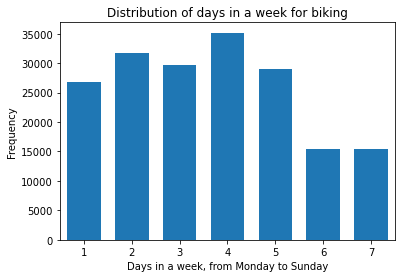

In [30]:
sd = []
for i in df_clean.start_time:
    sd.append(i.isoweekday())
plt.hist(sd, bins=np.arange(9)-0.5, rwidth = 0.7);
plt.xlim((0.5,7.5));

df_clean['start_day'] = sd

plt.xlabel('Days in a week, from Monday to Sunday');
plt.ylabel('Frequency');
plt.title('Distribution of days in a week for biking');

# clearly we can see that the peak day for bike ride is Thursday, and off-peak days are weekends

**Observation:** Clearly more bike tours happened in weekdays than weekends, maybe due to school and work. Thursday is most popular. In Feb 2019 we have 28 days and 4 days for each category, so it's fair to compare without weighted averaging.

In [32]:
df_weekend = df_clean.query("start_day == [6, 7]")
df_weekday = df_clean.query("start_day != [6, 7]")

**Question:** Which time in a day people would like to ride bike? Is there any difference between weekday and weekends?

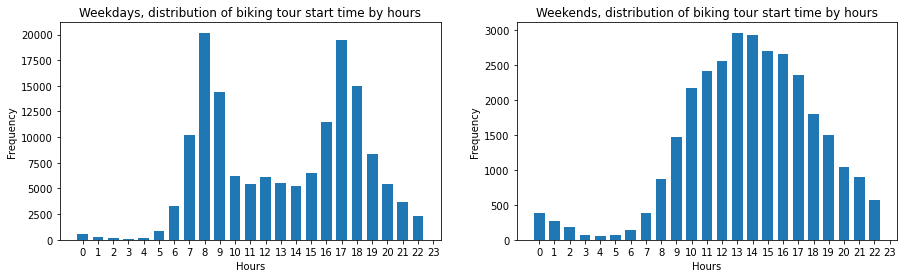

In [35]:
plt.figure(figsize=(15, 4));
plt.subplot(1, 2, 1) 
sh = []
for i in df_weekday.start_time: # for weekday
    sh.append(i.hour)
plt.hist(sh, bins=np.arange(24)-0.5, rwidth = 0.7);
ticks = np.arange(24)
labels = ['{}'.format(h) for h in ticks]
plt.xticks(ticks, labels);
plt.xlabel('Hours');
plt.ylabel('Frequency');
plt.title('Weekdays, distribution of biking tour start time by hours');

plt.subplot(1, 2, 2) 
sh = []
for i in df_weekend.start_time: # for weekend
    sh.append(i.hour)
plt.hist(sh, bins=np.arange(24)-0.5, rwidth = 0.7);
ticks = np.arange(24)
labels = ['{}'.format(h) for h in ticks]
plt.xticks(ticks, labels);
plt.xlabel('Hours');
plt.ylabel('Frequency');
plt.title('Weekends, distribution of biking tour start time by hours');

# on weekdays: peak hour are 8 AM and 17 PM respectively, associated with working hours
# on weekends: peak hour is 1 PM, after lunch time

**Observation:** During weekdays, peak hours for riding bike is same to rush hours for people to go to work and go back home. During weekends, peak hours is the time after lunch, maybe because it's warm at the coldest month in a year.

In [36]:
total = df_clean.shape[0]
turn_sameday = 0
turn_nextday = 0 # cannot turn bike the third day, since the maximum bike rike < 24 hours
for i in range(df_clean.shape[0]):
    if df_clean['start_date'][i] == df_clean['end_date'][i]:
        turn_sameday = turn_sameday + 1
    else:
        turn_nextday = turn_nextday + 1
print('turn the bike at same day:', round(turn_sameday/total*100, 2), '%', 'turn at next day:', round(turn_nextday/total*100, 2), '%')

# only 0.17% bike rides associated to second-day bike return

turn the bike at same day: 99.83 % turn at next day: 0.17 %


**Question:** Which stations are most popular for starting points and destinations?

Station 58: Market St at 10th St
Station 67: San Francisco Caltrain Station 2  (Townsend St at 4th St)


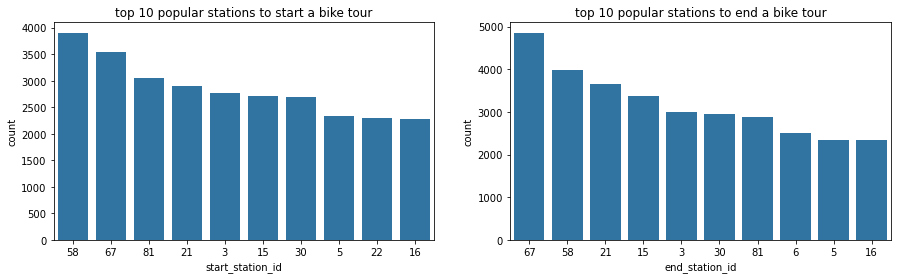

In [37]:
plt.figure(figsize=(15, 4));
plt.subplot(1, 2, 1)
order1 = df_clean['start_station_id'].value_counts().index[:10]
sb.countplot(data = df_clean, x = 'start_station_id', order=order1, color=base_color);
plt.title('top 10 popular stations to start a bike tour');

plt.subplot(1, 2, 2)
order2 = df_clean['end_station_id'].value_counts().index[:10]
sb.countplot(data = df_clean, x = 'end_station_id', order=order2, color=base_color);
plt.title('top 10 popular stations to end a bike tour');

# top 2 stations for popularity is 58, 67, for both departures and arrivals
print('Station 58:', df_clean[df_clean['start_station_id']=='58']['start_station_name'].iloc[0])
print('Station 67:', df_clean[df_clean['start_station_id']=='67']['start_station_name'].iloc[0])

**Observation:** Looks that station No.58 and 67 are most popular, both for start and end.

**Question:** Percentages for GoBike users' different attributes?

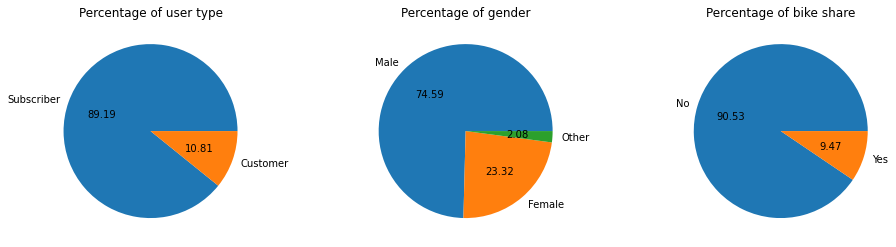

In [38]:
plt.figure(figsize=(16, 4));

plt.subplot(1, 3, 1)
user_count = df_clean.user_type.value_counts()
plt.pie(user_count, labels=user_count.index, autopct='%.2f');
plt.title('Percentage of user type');

plt.subplot(1, 3, 2)
gender_count = df_clean.member_gender.value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%.2f');
plt.title('Percentage of gender');

plt.subplot(1, 3, 3)
share_count = df_clean.bike_share_for_all_trip.value_counts()
plt.pie(share_count, labels=share_count.index, autopct='%.2f');
plt.title('Percentage of bike share');

**Observation:** Majority of users are subscribers, male and don't share bike during the tour. Maybe because subscribers cannot share the bike.

In [60]:
df_clean['member_birth_year'].describe()

# the birth_year of 1878 doesn't make much sense

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [61]:
df_clean[df_clean['member_birth_year']<=1929].member_birth_year.value_counts().sort_index()

# we shall start from 1930 (89 years old in 2001), older ages might be wrong data

1878     1
1900    53
1901     6
1902    11
1910     1
1920     3
1927     1
1928     1
Name: member_birth_year, dtype: Int64

**Question:** What about the distribution for age of users?

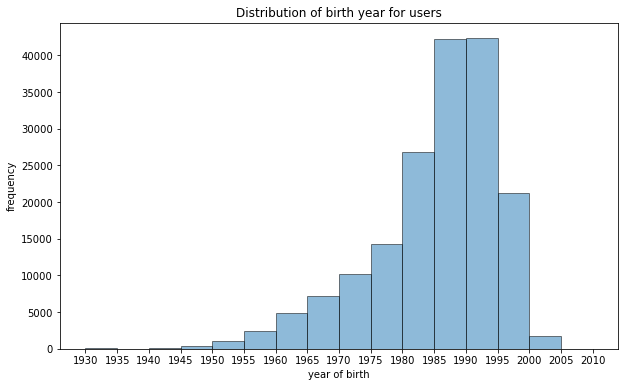

In [40]:
plt.figure(figsize=(10, 6));
bins = np.arange(1930, 2011, 5)
birth_year = df_clean['member_birth_year'].dropna()
plt.hist(birth_year, bins=bins, color=base_color, alpha=0.5, ec='black');
ticks = np.arange(1930, 2011, 5)
labels = ['{}'.format(h) for h in ticks]
plt.xticks(ticks, labels);
plt.xlabel('year of birth');
plt.ylabel('frequency');
plt.title('Distribution of birth year for users');

# most users are born between 1985 and 1995

**Observation:** most users born between 1985 to 1995, in 2019, they are between 24 to 34 years old.

### *Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?*

> 1. some super large data for bike riding duration, don't need to change, since all of them are less than 24 hours.
2. some end_date values are 2019-03-01 for the feburary dataset, don't need to change, since all of them started to use on 2019-02-28.
3. some people have very old age values, like above 90 years old, might be wrong data, but needn't to be changed, since it won't have effect on conclusions and other data for this ride are reasonable.
4. some people chose 'other' for gender, it's fine due to people's self-identification, and only with small percentage.

### *Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?*

> 1. most of those data trends look valid to me.
2. male user made up of around 75% of total users, which is a bit surprising.

## <font color='cornflowerblue'>Bivariate Exploration</font>

**Question:** Is there any differences between different gender, in terms of biking duration?

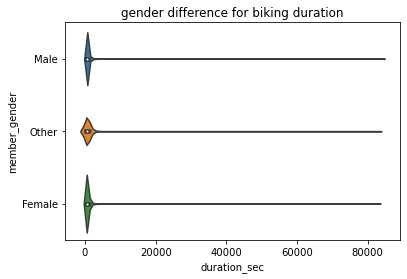

In [41]:
sb.violinplot(data=df_clean, y='member_gender', x='duration_sec'); 
plt.title('gender difference for biking duration');

# users in any gender categories might use the bike above 80000 seconds

**Observation:** Em... too many outliers, let's change a method of plotting.

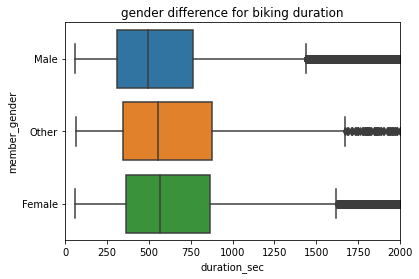

In [42]:
sb.boxplot(data=df_clean, y='member_gender', x='duration_sec'); 
plt.xlim((0, 2000));
plt.title('gender difference for biking duration');

# male users have less Q1, median and Q2 values for duration compared to female and other users

**Observation:** It is actually surprising that females ride bike for longer time on average. Since 75% users are male, maybe male users have more users that ride bike for very short time.

In [65]:
df_clean.groupby(['member_gender']).duration_sec.mean() # the trend above can also be applied to average duartion

member_gender
Female    779.372855
Male      672.893480
Other     997.827508
Name: duration_sec, dtype: float64

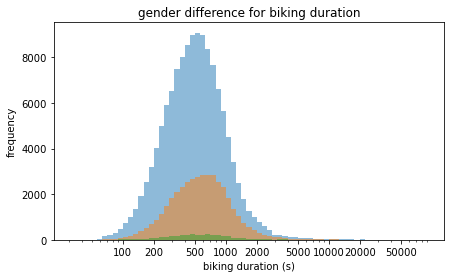

In [44]:
bins = 10**np.arange(1.5, 5, 0.05)
plt.figure(figsize=(7, 4));
plt.hist(data = df_clean[df_clean.member_gender == 'Male'], x = 'duration_sec', bins=bins, alpha=0.5);
plt.hist(data = df_clean[df_clean.member_gender == 'Female'], x = 'duration_sec', bins=bins, alpha=0.5);
plt.hist(data = df_clean[df_clean.member_gender == 'Other'], x = 'duration_sec', bins=bins, alpha=0.5);
plt.xscale('log')
ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
labels = ['{}'.format(h) for h in ticks]
plt.xticks(ticks, labels);
plt.title('gender difference for biking duration');
plt.xlabel('biking duration (s)');
plt.ylabel('frequency');

**Observation:** distribution of biking duration is more right-skewed for female users, which means that on average they are riding bike for longer time.

**Question:** Does biking duration has strong relationship to the age?

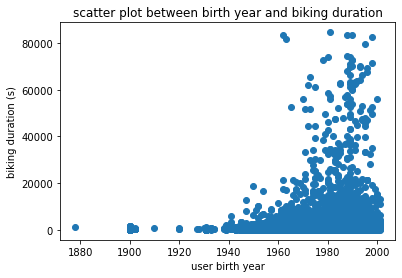

In [49]:
df_new = df_clean.dropna() # get rid of NaN values
plt.scatter(data = df_new, x = 'member_birth_year', y = 'duration_sec');
plt.xlabel('user birth year');
plt.ylabel('biking duration (s)');
plt.title('scatter plot between birth year and biking duration');

# clearly young people tend to ride for longer time

**Observation:** well, maybe the maximum biking duration are related to age, young people could have chance to make higher maximum riding duration.

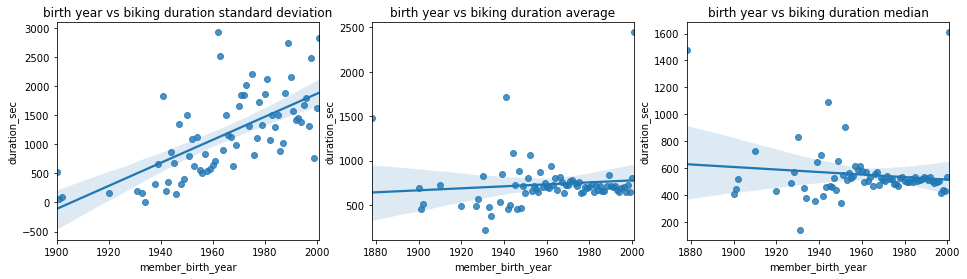

In [51]:
plt.figure(figsize=(16, 4));

plt.subplot(1, 3, 1)
avr_dur_yr = df_new.groupby(['member_birth_year']).duration_sec.std()
sb.regplot(x = avr_dur_yr.index, y = avr_dur_yr);
plt.title('birth year vs biking duration standard deviation');

plt.subplot(1, 3, 2)
avr_dur_yr = df_new.groupby(['member_birth_year']).duration_sec.mean()
sb.regplot(x = avr_dur_yr.index, y = avr_dur_yr);
plt.title('birth year vs biking duration average');

plt.subplot(1, 3, 3)
avr_dur_yr = df_new.groupby(['member_birth_year']).duration_sec.median()
sb.regplot(x = avr_dur_yr.index, y = avr_dur_yr);
plt.title('birth year vs biking duration median');

# no obvious trend could be found

**Observation:** actually user age and average biking duration doesn't have very clear correlation.

In [53]:
start_num = df_clean.start_station_id.value_counts()
dict1 = df_clean.groupby(['start_station_id'])[['start_station_latitude', 'start_station_longitude']].mean()
print(df_clean.groupby(['start_station_id'])[['start_station_latitude', 'start_station_longitude']].std().describe())

# calculate the latitude and longitude for different stations as starts, and standard deviation shall be almost zero

       start_station_latitude  start_station_longitude
count                   329.0                    329.0
mean                      0.0                      0.0
std                       0.0                      0.0
min                       0.0                      0.0
25%                       0.0                      0.0
50%                       0.0                      0.0
75%                       0.0                      0.0
max                       0.0                      0.0


In [54]:
start_lat = []
start_log = []
for i in range(start_num.shape[0]):
    for v in range(dict1.shape[0]):
        if dict1.index[v] == start_num.index[i]:
            start_lat.append(dict1.start_station_latitude[v])
            start_log.append(dict1.start_station_longitude[v])
            break

In [55]:
end_num = df_clean.end_station_id.value_counts()
dict2 = df_clean.groupby(['end_station_id'])[['end_station_latitude', 'end_station_longitude']].mean()
print(df_clean.groupby(['end_station_id'])[['end_station_latitude', 'end_station_longitude']].std().describe())

# calculate the latitude and longitude for different stations as ends, and standard deviation shall be almost zero

       end_station_latitude  end_station_longitude
count                 329.0                  329.0
mean                    0.0                    0.0
std                     0.0                    0.0
min                     0.0                    0.0
25%                     0.0                    0.0
50%                     0.0                    0.0
75%                     0.0                    0.0
max                     0.0                    0.0


In [56]:
end_lat = []
end_log = []
for i in range(end_num.shape[0]):
    for v in range(dict1.shape[0]):
        if dict2.index[v] == end_num.index[i]:
            end_lat.append(dict2.end_station_latitude[v])
            end_log.append(dict2.end_station_longitude[v])
            break

**Question:** how many geographical areas the dataset came from?

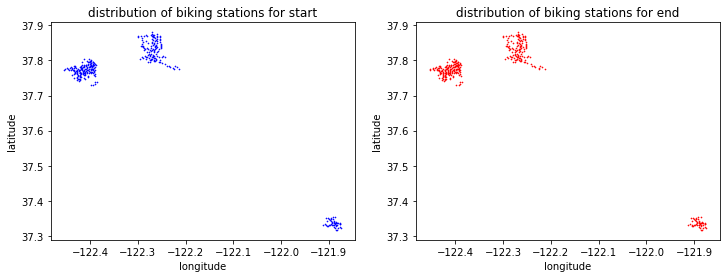

In [58]:
plt.figure(figsize=(12, 4));
plt.subplot(1, 2, 1)
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.title('distribution of biking stations for start');
plt.scatter(x = start_log, y = start_lat, s=0.4, color='b');
plt.subplot(1, 2, 2)
plt.scatter(x = end_log, y = end_lat, s=0.4, color='r');
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.title('distribution of biking stations for end');

# there are three main areas for starts and ends, looks quite alike
# actually they are 3 cities: san francisco (upper left), oakland (upper right) and san jose (lower right)

**Observation:** we can see 3 regions here, by checking Google maps, they are San Francisco, Oakland and San Jose.

In [60]:
city_s = []
city_list = ['San Francisco', 'Oakland', 'San Jose']
for i in range(total):
    if df_clean.start_station_longitude[i]>-122.1:
        city_s.append(city_list[2])
    elif df_clean.start_station_longitude[i]<-122.35:
        city_s.append(city_list[0])
    else:
        city_s.append(city_list[1])
df_clean['start_city'] = city_s # add a column to indicate the city to start

In [61]:
city_e = []
city_list = ['San Francisco', 'Oakland', 'San Jose']
for i in range(total):
    if df_clean.start_station_longitude[i]>-122.1:
        city_e.append(city_list[2])
    elif df_clean.start_station_longitude[i]<-122.35:
        city_e.append(city_list[0])
    else:
        city_e.append(city_list[1])
df_clean['end_city'] = city_e # add a column to indicate the city to end

In [62]:
for i in range(total):
    if df_clean.start_city[i] != df_clean.end_city[i]:
        print(df_clean.iloc[1, :])
        
# nothing print out, means nobody ride bike among cities

In [63]:
df_clean['city'] = df_clean['start_city']
df_clean.drop(['start_city', 'end_city'], axis=1, inplace=True) # now we only need one column called city, which is enough

**Question:** Which city has most users?

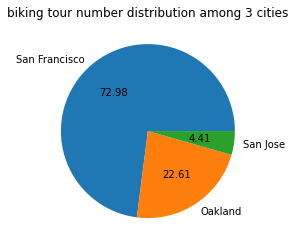

In [84]:
# user percentage among cities

city_count = df_clean.city.value_counts()
plt.pie(city_count, labels=city_count.index, autopct='%.2f');
plt.title('biking tour number distribution among 3 cities');

**Observation:** San Francisco contributed 73% of GoBike users.

**Question:** The longest trip for each city?

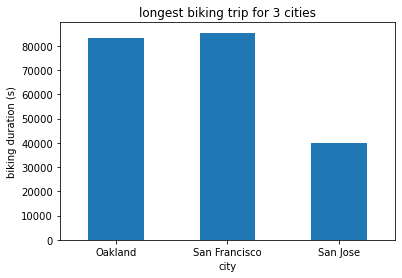

In [87]:
df_clean.groupby(['city']).duration_sec.max().plot(kind='bar');
plt.xticks(rotation = 0);
plt.ylabel('biking duration (s)')
plt.title('longest biking trip for 3 cities');

**Observation:** San Francisco and Oakland have biking tours longer than 80000s, but San Jose only have biking tours longer than 40000s, maybe due to much smaller user group.

**Question:** average biking durations in 3 cities?

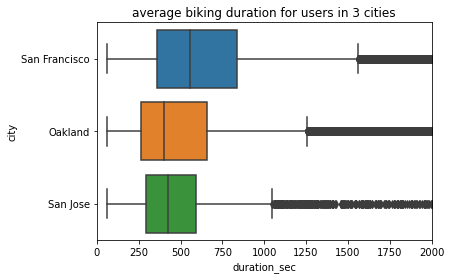

In [93]:
sb.boxplot(data=df_clean, y='city', x='duration_sec'); 
plt.xlim((0, 2000));
# generally speaking, san francisco users ride bike for longer time
plt.title('average biking duration for users in 3 cities');

**Observation:** San Francisco users biking for longer time relatively, perhaps due to more traffic jam and larger city scale.

### *Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?*

> 1. female users ride bike for longer time than male users.
2. users in san francisco ride bike for longer time than users from other cities.

### *Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?*

> 1. the dataset actually includes information from 3 cities, san francisco, san jose and oakland, though they are closed to each other. 
2. no user ride bike from one city to another city.

## <font color='cornflowerblue'>Multivariate Exploration</font>

**Question:** which region of 3 cities are more popular for biking events?

In [67]:
fq = (df_clean.start_station_id.value_counts() + df_clean.end_station_id.value_counts())
st = []
ct = []
for i in range(fq.shape[0]):
    st.append(df_clean[df_clean.start_station_id == fq.index[i]].start_station_name.iloc[0])
    ct.append(df_clean[df_clean.start_station_id == fq.index[i]].city.iloc[0])

In [68]:
test = pd.concat([fq, dict1], axis=1)
test.columns=['frequency', 'lat', 'log']
test['station']=st
test['city']=ct

In [69]:
df_sf = test.query("city == 'San Francisco'")
df_sf.frequency.value_counts()
df_sj = test.query("city == 'San Jose'")
df_ok = test.query("city == 'Oakland'")

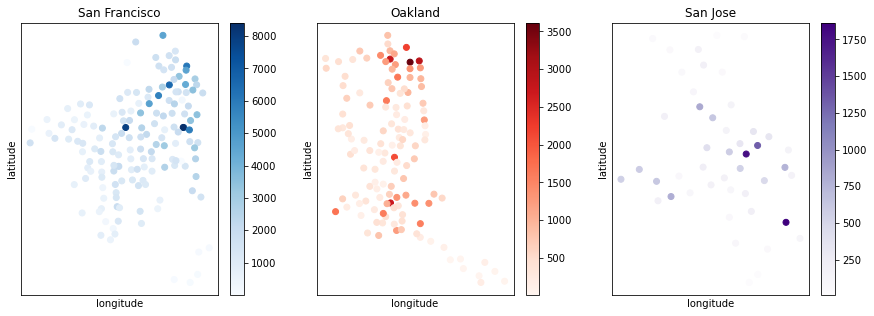

In [94]:
plt.figure(figsize=(15, 5));

plt.subplot(1, 3, 1)
plt.scatter(data = df_sf, x = 'log', y = 'lat', c = 'frequency', cmap = 'Blues');
plt.xticks([]);
plt.yticks([]);
plt.title('San Francisco');
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.colorbar();

plt.subplot(1, 3, 2)
plt.scatter(data = df_ok, x = 'log', y = 'lat', c = 'frequency', cmap = 'Reds');
plt.xticks([]);
plt.yticks([]);
plt.title('Oakland');
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.colorbar();

plt.subplot(1, 3, 3)
plt.scatter(data = df_sj, x = 'log', y = 'lat', c = 'frequency', cmap = 'Purples');
plt.xticks([]);
plt.yticks([]);
plt.title('San Jose');
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.colorbar();

**Observation:** NE San Francisco, NE & S in Oakland and SE in San Jose have more frequent biking events.

In [71]:
df_sf.sort_values(by=['frequency'], ascending=False)[:5].station

start_station_id
67    San Francisco Caltrain Station 2  (Townsend St...
58                                 Market St at 10th St
21     Montgomery St BART Station (Market St at 2nd St)
15    San Francisco Ferry Building (Harry Bridges Pl...
81                                   Berry St at 4th St
Name: station, dtype: object

**Question:** the percentage of users and subscriber in 3 cities?

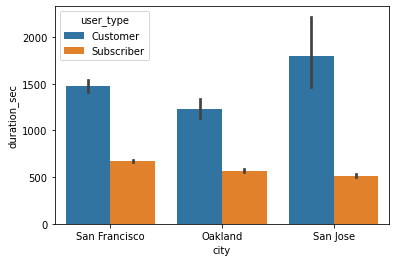

In [72]:
sb.barplot(data = df_clean, x = 'city', y = 'duration_sec', hue = 'user_type');

# no matter which city, customers' average riding durations are much longer than subscribers

**Observation:** customer are much more than subscribers, especially in San Jose.

**Question:** for 3 cities, users have what kind of preference of durations for biking in weekdays/weekend?

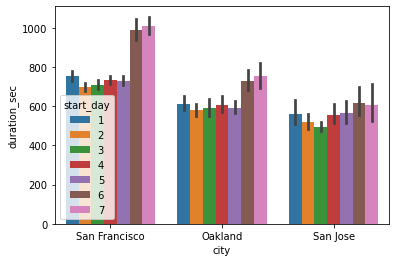

In [73]:
sb.barplot(data = df_clean, x = 'city', y = 'duration_sec', hue = 'start_day');

# in San Jose, users ride bikes with similar duration for weekends and weekdays, while in other cities, users ride for longer time during weekends

**Observation:** clearly in SF and Oakland, people biking for longer time during weekends, but this trend is not clear on San Jose. Maybe the traffic in San Jose doesn't change much from weekdays to weekends.

**Question:** bike sharing percentages in different cities?

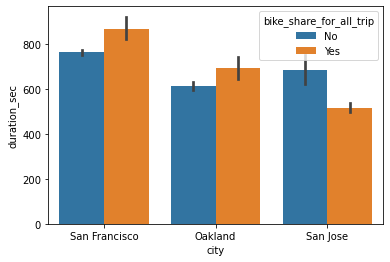

In [88]:
sb.barplot(data = df_clean, x = 'city', y = 'duration_sec', hue = 'bike_share_for_all_trip');

**Observation:** Lower bike sharing rate in San Jose and higher rate in rest cities.

**Question:** preference of biking time during weekdays/weekends for different gender?

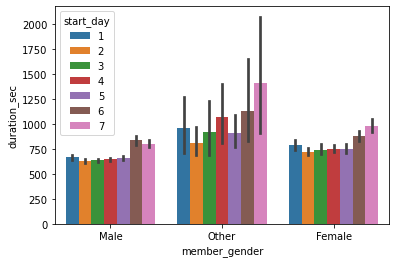

In [75]:
sb.barplot(data = df_new, x = 'member_gender', y = 'duration_sec', hue = 'start_day');

**Observation:** no meaningful trends observed, no matter what gender users have, they perfer to ride for longer time during weekends.

In [76]:
test.sort_values(by=['frequency'], ascending=False)[:3]

,frequency,lat,log,station,city
start_station_id,,,,,
67,8401,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,San Francisco
58,7877,37.776619,-122.417385,Market St at 10th St,San Francisco
21,6542,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),San Francisco


In [77]:
df_67s = df_clean.query("start_station_id == '67'")
df_67s.end_station_id.value_counts()

58     147
21     137
90     128
89     117
16     110
      ... 
360      1
141      1
140      1
361      1
137      1
Name: end_station_id, Length: 145, dtype: int64

In [78]:
df_67e = df_clean.query("end_station_id == '67'")
df_67e.start_station_id.value_counts()

90     272
58     239
89     222
350    166
60     143
      ... 
29       1
361      1
131      1
375      1
118      1
Name: start_station_id, Length: 145, dtype: int64

In [79]:
test2 = []
for i in range(total):
    test2.append(df_clean.start_station_id[i]+'-'+df_clean.end_station_id[i])

In [80]:
from collections import Counter
freq = Counter(test2)
freq_new = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))

In [81]:
list( freq_new.keys())[:10]

['81-15',
 '15-6',
 '196-182',
 '6-16',
 '182-196',
 '58-21',
 '90-67',
 '280-296',
 '58-3',
 '296-280']

In [82]:
list( freq_new.values())[:10]

[337, 314, 310, 285, 284, 272, 272, 249, 247, 242]

In [89]:
net = []
ride_out = []
ride_in = []
category = []
for i in range(test.shape[0]):
    key = test.index[i]
    a = df_clean[df_clean.start_station_id == key].shape[0]
    b = df_clean[df_clean.end_station_id == key].shape[0]
    ride_out.append(a)
    ride_in.append(b)
    if a > b:
        category.append('out')
    elif a < b:
        category.append('in')
    else:
        category.append('equal')
test['out'] = ride_out
test['in'] = ride_in
test['category'] = category

**Question:** How many stations have bike surplus, how many for bike shortage?

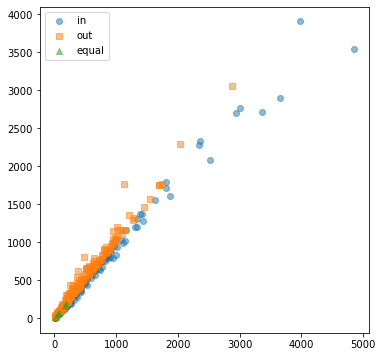

In [90]:
plt.figure(figsize=(13, 6));
plt.subplot(1, 2, 1)
mks = [['in', 'o'], ['out', 's'], ['equal', '^']]
for i, v in mks:
    test_i = test[test['category'] == i]
    plt.scatter(data = test_i, x ='in', y ='out', marker = v, alpha=0.5);
plt.legend(['in','out', 'equal']);

**Observation:** Only few stations have severe bike shortage or surplus, most of them have balanced bike in and out.

In [99]:
test['net'] = test['in'] - test['out']

In [100]:
test.sort_values(by=['net'])[:5] # places bikes flow out

,frequency,lat,log,station,city,out,in,category,net
start_station_id,,,,,,,,,
243,2894,37.869360,-122.254337,Bancroft Way at College Ave,Oakland,1770,1124,out,-646
253,1272,37.866418,-122.253799,Haste St at College Ave,Oakland,798,474,out,-324
22,4327,37.789756,-122.394643,Howard St at Beale St,San Francisco,2293,2034,out,-259
71,999,37.773063,-122.439078,Broderick St at Oak St,San Francisco,624,375,out,-249
343,2096,37.783172,-122.393572,Bryant St at 2nd St,San Francisco,1145,951,out,-194


In [101]:
test.sort_values(by=['net'], ascending=False)[:5] # places bikes flow in

,frequency,lat,log,station,city,out,in,category,net
start_station_id,,,,,,,,,
67,8401,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,San Francisco,3544,4857,in,1313
21,6542,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),San Francisco,2895,3647,in,752
15,6078,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco,2710,3368,in,658
6,4594,37.804770,-122.403234,The Embarcadero at Sansome St,San Francisco,2082,2512,in,430
44,3476,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,San Francisco,1611,1865,in,254


In [102]:
test.net.sum()

# for the dataset, times of bike out = times of bike in

0

**Question:** how many stations are relatively well-balanced for bike number?

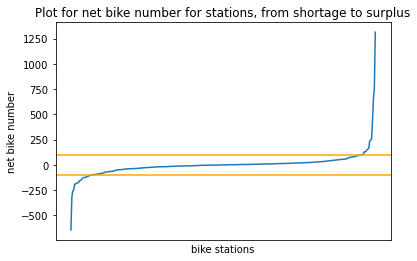

In [106]:
test.sort_values(by=['net']).net.plot(kind='line');
plt.xticks([]);
plt.xlabel('bike stations');
plt.ylabel('net bike number');
plt.title('Plot for net bike number for stations, from shortage to surplus');
plt.axhline(100, color='orange');
plt.axhline(-100, color='orange');

**Observation:** most bike stations' bike number are relatively balanced, without severe shorage or surplus.

In [104]:
print(round(100*(test[test.net<=100].shape[0] - test[test.net<-100].shape[0])/test.shape[0], 2),'% of stations have monthly bike inflow or outflow less than 100.')

88.75 % of stations have monthly bike inflow or outflow less than 100.


### *Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?*

> 1. in San Jose, users ride bikes with similar duration for weekends and weekdays, while in other cities, users ride for longer time during weekends.
2. San Francisco have most active bike riding activities in general.

### *Were there any interesting or surprising interactions between features?*

> 1. several stations has large monthly net bike inflow or outflow, but total net bike flow for the dataset is zero, which proves data accuracy.
2. two stations in Oakland are amazingly top 2 for monthly bike outflow ranking.
3. users who put 'others' for gender have apparent longer average riding durations than male and female users.